In [1]:
!python -V

Python 3.11.11


In [2]:
import pandas as pd
import pickle
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, root_mean_squared_error

In [4]:
# Load both parquet files
df = pd.read_parquet(r'./data/yellow_tripdata_2023-01.parquet')
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,9.30,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,7.90,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,14.90,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,N,138,7,1,12.10,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,11.40,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3066761,2,2023-01-31 23:58:34,2023-02-01 00:12:33,NaN,3.05,NaN,None,107,48,0,15.80,0.00,0.5,3.96,0.0,1.0,23.76,NaN,NaN
3066762,2,2023-01-31 23:31:09,2023-01-31 23:50:36,NaN,5.80,NaN,None,112,75,0,22.43,0.00,0.5,2.64,0.0,1.0,29.07,NaN,NaN
3066763,2,2023-01-31 23:01:05,2023-01-31 23:25:36,NaN,4.67,NaN,None,114,239,0,17.61,0.00,0.5,5.32,0.0,1.0,26.93,NaN,NaN
3066764,2,2023-01-31 23:40:00,2023-01-31 23:53:00,NaN,3.15,NaN,None,230,79,0,18.15,0.00,0.5,4.43,0.0,1.0,26.58,NaN,NaN


In [5]:
# Q1
print("Q1: Number of columns:", df.shape[1])
print("Q1: Number of rows:", df.shape[0])
print("Q1: Column names:", df.columns.tolist())


Q1: Number of columns: 19
Q1: Number of rows: 3066766
Q1: Column names: ['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime', 'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag', 'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'airport_fee']


In [6]:
# Q2
df['duration'] = (df.tpep_dropoff_datetime - df.tpep_pickup_datetime).dt.total_seconds() / 60
print("Q2: Standard deviation of duration:", round(df['duration'].std(), 2))

Q2: Standard deviation of duration: 42.59


In [7]:
# Fraction after dropping outliers
initial_len = len(df)
df = df[(df.duration >= 1) & (df.duration <= 60)]
fraction = len(df) / initial_len
print(round(fraction, 2))

print("Q2: Fraction of rows after dropping outliers:", round(fraction))

0.98
Q2: Fraction of rows after dropping outliers: 1


In [8]:
# Compute duration
df.loc[:, 'duration'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds() / 60

# Filter durations between 1 and 60 mins
df = df.loc[(df['duration'] >= 1) & (df['duration'] <= 60)].copy()


In [9]:


# Define categorical and numerical columns
categorical = ['PULocationID', 'DOLocationID']
numerical = ['trip_distance']


In [10]:

# Cast categorical to string
df[categorical] = df[categorical].astype(str)

# Now continue your analysis here (e.g., model training, feature engineering)


In [11]:
train_dicts = df[categorical + numerical].to_dict(orient='records')

dv = DictVectorizer()
X_train = dv.fit_transform(train_dicts)

target = 'duration'
y_train = df[target].values

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_train)

root_mean_squared_error(y_train, y_pred)

7.65839726314459

In [12]:
print("Q4: Dimensionality:", X_train.shape[1])

Q4: Dimensionality: 516


In [13]:
# sns.distplot(y_pred, label='prediction')
# sns.distplot(y_train, label='actual')

# plt.legend()

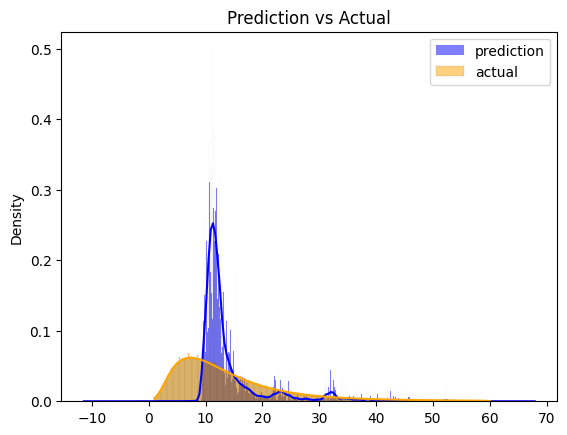

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(y_pred, label='prediction', kde=True, stat='density', color='blue', alpha=0.5)
sns.histplot(y_train, label='actual', kde=True, stat='density', color='orange', alpha=0.5)

plt.legend()
plt.title("Prediction vs Actual")
plt.show()


In [15]:
import os
import pickle

# Ensure the directory exists
os.makedirs('models', exist_ok=True)

# Save the model
with open('models/lin_reg.bin', 'wb') as f_out:
    pickle.dump((dv, lr), f_out)


In [16]:
# ---------- Step 1: Helper to read & preprocess dataframe ----------
def read_dataframe(filename):
    df = pd.read_parquet(filename)
    df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'], errors='coerce')
    df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'], errors='coerce')
    df = df.dropna(subset=['tpep_dropoff_datetime', 'tpep_pickup_datetime'])
    df['duration'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds() / 60
    df = df[(df.duration >= 1) & (df.duration <= 60)].copy()
    df[['PULocationID', 'DOLocationID']] = df[['PULocationID', 'DOLocationID']].astype(str)
    return df

# ---------- Step 2: Load and process both datasets ----------
df_train = read_dataframe('./data/yellow_tripdata_2023-01.parquet')
df_val = read_dataframe('./data/yellow_tripdata_2023-02.parquet')

# ---------- Step 3: Vectorization ----------
categorical = ['PULocationID', 'DOLocationID']

dv = DictVectorizer()
train_dicts = df_train[categorical].to_dict(orient='records')
X_train = dv.fit_transform(train_dicts)
y_train = df_train['duration'].values

val_dicts = df_val[categorical].to_dict(orient='records')
X_val = dv.transform(val_dicts)
y_val = df_val['duration'].values

# ---------- Step 4: Train model ----------
lr = LinearRegression()
lr.fit(X_train, y_train)

# ---------- Step 5: Evaluate ----------
y_pred_train = lr.predict(X_train)
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
print("Q5: RMSE on train:", round(rmse_train, 2))  # should be ~7.64

y_pred_val = lr.predict(X_val)
rmse_val = np.sqrt(mean_squared_error(y_val, y_pred_val))
print("Q6: RMSE on validation:", round(rmse_val, 2))  # should be ~7.81


Q5: RMSE on train: 7.65
Q6: RMSE on validation: 7.81
